# Quantum Entanglement
![Entanglement banner](img/banner.jpg)
Quantum Entanglement is a physical phenomenon in which quantum states of multiple subsystems **can not be described independently of each other, even though the subsystems are separated to a great distance**. Thus any action of wave function collapse on either of the particle can give the certainty about the other particle irrespective of its local system.

## Easy Understanding:
For an instance, if you have two exactly similar quantum coins with two sides H and T. You somehow spinned and entangled the coins and gave one coin to your girlfriend/boyfriend. Now you left the planet and went to Proxima Centauri B and there at a particular instance of time you stopped your spinning coin and get the output as H, since the two coins were entangled you have the certaininty of the result your mate will measure back on earth by stopping it at the very instance. This happens instantly even if you are light years apart. Probably very romantic if you are going on a space exploration but it was not that pleasant for Albert Einstein, he called it "*spooky action at distance*". According to his realtivity theory, nothing can travel faster than the speed of light. So, how come the infomation of the wave function collapse of the particle A travelled to particle B at very instance. He also proposed a thought experiment as EPR Theory which got famous as The EPR Paradox in which he proposed an experimental setup that showed how this theory of qauantum entanglement is absurd with respect to the Werner Heisenberg Uncertaininty Principle. But here in this article, we are going to entangle qunatum bits by just using few lines of python code.

## Mathematical Defination:
A quantum subsystem is said to be entangled only if its state can not be written as a product state. A product state is the simplest state of a composite system. Suppose there is a composite quantum system that is described as 
$H = H_1 \otimes H_2 \otimes H_3 \otimes H_4 \otimes H_5 \otimes ... H_n $
where $H_n$ is the underlying **Hilbert spaces** of their respective quantum systems. A state $|Z> \in H$ is entangled only if it can not be described in the vector form $|Z> = |Z_1> \otimes  |Z_2> \otimes  |Z_3> \otimes ... |Z_n>$. As you can see in product states, the states of all the subsystems behave independently. Thus, the state of one subsystem doesn't affect the state of the other system in the vector space.

### Entangled coins:
Now, lets understand the above example in a bit more mathematical form. For the time being I would call you $A$ and your mate as $B$. When you took the quantum coins before entanglement and spun them, thier superposition can be represented as:

\begin{equation*}
|\psi_A> \ = \alpha_A|H> + \beta_A|T>
\end{equation*}
\begin{equation*}
|\psi_B> \ = \alpha_B|H> + \beta_B|T>
\end{equation*}

We can write the product state of the above quantum subsystems as:

\begin{equation*}
|\psi_{AB}> \ = (\alpha_A|H> + \beta_A|T>) \otimes (\alpha_B|H> + \beta_B|T>)
\end{equation*}

\begin{equation*}
|\psi_{AB}> \ = \alpha_A\alpha_B|HH> + \alpha_A\beta_B|HT> + \beta_A\alpha_B|TH> + \beta_A\beta_B|TT>
\end{equation*}

Since the eigenstates of one subsystem doesn't affect the others, carry more information than the states prepared by the coins separately and can be factorized, we can certainly say these coins are not entangled.<br><br>So, now let's form singlet and triplet states that carry no information of the particles separately, state of one subsystem affects the sate of others and can not be factored into substates. Thus, creating quantumly entangled sates of the coins.

Singlet state:
\begin{equation*}
|\psi> \ = \frac{1}{\sqrt{2}}( |HT> - |TH> )
\end{equation*}

Now, the Triplet states:
\begin{equation*}
|\psi_1> \ = \frac{1}{\sqrt{2}}( |HT> + |TH> )
\end{equation*}
\begin{equation*}
|\psi_1> \ = \frac{1}{\sqrt{2}}( |HH> + |TT> )
\end{equation*}
\begin{equation*}
|\psi_1> \ = \frac{1}{\sqrt{2}}( |HH> - |TT> )
\end{equation*}

This triplet state carries the complete information of the composite system and carries no information about the individual subsystems.<br><br>

#### Now let us make a quantum circuit using Qiskit and Python that actually creates entanglement step by step:<br><br>

### Importing QISKIT and related libraries for visualization:

In [52]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

## Creating a Quantum Circuit:
Here I have created two quantum registers i.e. qubits that we will be entangled together and two classical registers that will help us read the classical values out of the quantum registers. We then finally create the circuit object with the registers.

In [53]:
q_reg = QuantumRegister(2,'q')
c_reg = ClassicalRegister(2,'c')
circuit = QuantumCircuit(q_reg,c_reg)

### Visualizing the circuit:
The circuit just has the quantum registers ($q_0$ and $q_1$) and the two classical registers are represented by $c$ represented as a single line.

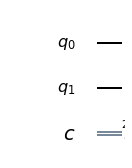

In [54]:
circuit.draw(output = 'mpl')

## Adding Quantum Gates to the circuit:
We first add the **Not gate** to the $q_1$ to perform a $\pi \ radian$  rotation along the **z-axis** in the bloch sphere model to convert from $|0>$ to $|1>$. We then apply the **Hadamard Gate** to the $q_2$ to perform a $\pi \ radian$ rotation along the **z-axis** and $\frac{\pi}{2} \ radian$ along the **y-axis** in the bloch sphere model to project in the **x-axis** and put it in a superposition of its value on the **z-axis**. This can be formulated as:
\begin{equation*}
H|0> \ = \frac{1}{\sqrt2}(|0>+|1>)
\end{equation*}
Then we apply the **measurement gates** on both the quantum registers to measure their classical values alone the **z-axis**.

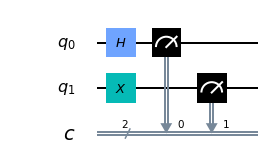

In [55]:
circuit.x(q_reg[1])
circuit.h(q_reg[0])
circuit.measure(q_reg,c_reg)
circuit.draw(output = 'mpl')

## Running the quantum circuit on the simulator:
We are now creating the simulator object that will execute the circuit and extract the result. The result will be in the form of a probability density matrix which will be plotted as histograms for visualization. We will then analyze the output to see if it is entangled or not.

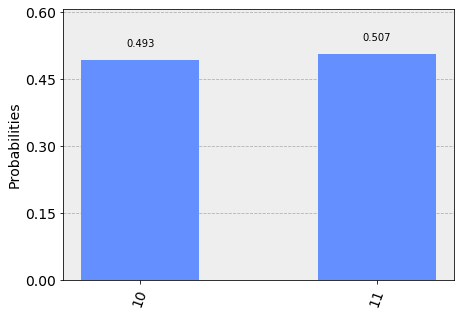

In [56]:
stimulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend = stimulator).result()
plot_histogram(result.get_counts(circuit))

## Result Analysis:
Before analyzing the result let's first analyze the curcuit itself. The circuit had two quantum registers $q_1$ and $q_2$, where $q_1$ was in superpositoin i.e. $|q_1> \ = \frac{1}{\sqrt2}(|0>+|1>)$ and the $q_2$ as $|1>$. Now the sate of the composite system of these subsystems can be represented as:
\begin{equation*}
\frac{1}{\sqrt2}(|0>+|1>) \otimes (|1>)
\end{equation*}

Thus the composite equation is:
\begin{equation*}
\frac{1}{\sqrt2}(|01>+|11>)
\end{equation*}
So is in the result, the only outputs were $01$ and $11$. We can see this is a product state of the subsystems because the state of one subsystem doesn't affect the other, can be normalized easily as the sate of every subsystem can be defined independently. For example:

\begin{equation*}
\frac{1}{\sqrt2}|01>+\frac{1}{\sqrt2}|11>
\end{equation*}
<br>
\begin{equation*}
\psi_{12}|01>+\psi_{12}|11>\\
\end{equation*}<br>
where $|\psi_{12}|^2$ is the **probability of the output from $q_1$ and $q_2$**

> Now, to make these registers entangled, we need to have such a equation of the composite system that doesn't have any information about the subsystems independently and can't be factorized.

## Applying CNOT gate:
Now, we are applying the **Controlled Not gate** on $q_1$ as the **control** and the $q_2$ as the **target**. Doing this will enable us to perform a **NOT** operation i.e. $\frac{\pi}{2} \ radian$ rotation along the **z-axis** on $q_2$ whenever the value of $q_1$ is $|1>$. Lets apply the gate and visualize the curcuit!

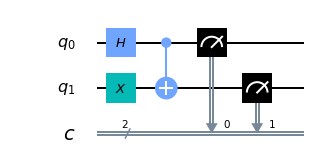

In [57]:
q_reg_ent = QuantumRegister(2,'q')
c_reg_ent = ClassicalRegister(2,'c')
ent_circuit = QuantumCircuit(q_reg,c_reg)
ent_circuit.x(q_reg_ent[1])
ent_circuit.h(q_reg_ent[0])
ent_circuit.cx(q_reg_ent[0],q_reg_ent[1])
ent_circuit.measure(q_reg_ent,c_reg_ent)
ent_circuit.draw(output = 'mpl')

## Run the circuit on the simulator:
Let's run the newly create a circuit on the simulator and analyze if we were able to create entanglement?

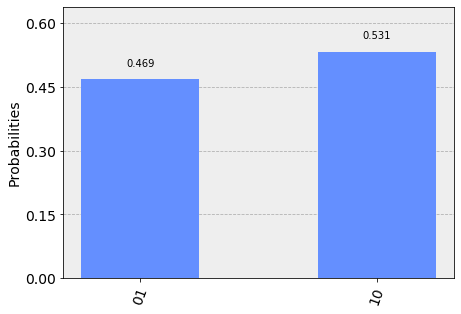

In [58]:
result = execute(ent_circuit, backend = stimulator).result()
plot_histogram(result.get_counts(ent_circuit))

## Result analysis:
As we did the last time, let us first go through the circuit and that would provide us all the reasons for the results and answers to our questions. This new circuit is similar to the previous one till the application of the Hadamard and the Not gate on $q_1$ and $q_2$. So, let us formulate what we can from the previous circuit:

\begin{equation*}
\frac{1}{\sqrt2}(|0>+|1>) \otimes (|1>)
\end{equation*}

Now, before finding the tensor product we need to consider the **Controlled Not gate** we applied in the circuit. When the state of $q_1$ is $|1>$ the gate performs a **Not** operation on $q_2$. Thus, the final composite equation would be:

\begin{equation*}
\frac{1}{\sqrt2}(|01>+|10>)
\end{equation*}

So, we can see in the equation and the result itself, the outputs are $01$ and $10$. Now as we see this composite system state can not be factorized as the individual information of the subsystems got lost and the state of one subsystem give the certainity for other i.e. when $q_1 = |0>$ $q_2 = |1>$ and when $q_1 = |1>$ $q_2 = |0>$.<br><br>

## We have finally entangled the registers successfully!

<br><br>
### Author: **Aman Kumar Nirala**
>"I hope this helped you in understanding Quantum entanglement and its application in quantum computers. I tried to make it as simple as I can and not including unnecessary theories or equations. Thanks for reading."

# **❤ Support**
If you like my work, a bit of contribution would motivate me a lot for more open source contributions.

[![Donate](https://img.shields.io/badge/Donate-PayPal-green.svg)](https://www.paypal.me/amannirala13)

*Please support the work:*
 - [Follow on **Github**](https://github.com/amannirala13)
 - [Follow on **LinkedIn**](https://www.linkedin.com/in/amannirala13/)
 - [Follow on **Twitter**](https://twitter.com/AmanNirala13)
 - [Follow on **Instagram**](https://www.instagram.com/amannirala13/)
 - [Follow on **Research Gate**](https://www.researchgate.net/profile/Aman_Nirala)
